In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
train_pth = glob.glob('./Nordigen_DS_homework_2021/train.csv')[0]
test_pth = glob.glob('./Nordigen_DS_homework_2021/test.csv')[0]

In [3]:
train_df = pd.read_csv(train_pth)
train_df = train_df[~train_df['comment'].isna()]

In [4]:
test_df = pd.read_csv(test_pth)

In [5]:
set(train_df.columns)-set(test_df.columns)

{'label'}

In [6]:
train_df.head()

,id,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,0,"""""I like my shortstops how I like my beef... i...",yourstrulytony,Dodgers,3,3,0,2016-06,2016-06-10 16:13:47,Need my Dodgerbros help returning fire at my c...
1,2,1,He works in mysterious ways,polarbear2217,atheism,1,1,0,2013-01,2013-01-26 23:59:33,"My cousin was perfect when he was born, except..."
2,3,0,You're right,ineedtotakeashit,news,18,18,0,2015-11,2015-11-11 23:12:16,"Not defending the deplorable scam, but the per..."
3,4,0,Is this amount of meat in the ratio of meat to...,HylianHal,FoodPorn,3,3,0,2016-08,2016-08-20 06:35:45,"I'm on my break from 4th st Deli right now, th..."
4,5,0,You can hug and kiss my ass X and O,ShyTownNinja_NasFlo,BlackPeopleTwitter,2,2,0,2016-05,2016-05-04 15:18:15,can yall pls stop reposting this one. it aint ...


In [7]:
train_df.describe()
# this looks pretty balanced on label field

,id,label,score,ups,downs
count,909697.000000,909697.000000,909697.000000,909697.000000,909697.000000
mean,454873.067614,0.499982,6.871425,5.493787,-0.145882
std,262621.425774,0.500000,47.729574,41.206745,0.352988
min,1.000000,0.000000,-507.000000,-507.000000,-1.000000
25%,227435.000000,0.000000,1.000000,0.000000,0.000000
50%,454872.000000,0.000000,2.000000,1.000000,0.000000
75%,682310.000000,1.000000,4.000000,3.000000,0.000000
max,909744.000000,1.000000,7563.000000,5163.000000,0.000000


In [8]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year

In [9]:
train_df['created_utc_by_months'] = pd.to_datetime(train_df['created_utc'].str.split().apply(lambda x: x[0][:-3]))
train_df['created_utc_by_days'] = pd.to_datetime(train_df['created_utc'].str.split().apply(lambda x: x[0]))

In [10]:
(train_df['created_utc_by_months']==train_df['date']).value_counts()
# okay

True    909697
dtype: int64

In [11]:
((train_df['ups']-train_df['downs'])==train_df['score']).value_counts()

True     782698
False    126999
dtype: int64

# Why doesnt description of score correspond with computing?

In [12]:
train_df['my_score'] = train_df['ups']-train_df['downs']

In [13]:
train_df[train_df['my_score']!=train_df['score']]['ups'].value_counts()

-1    126999
Name: ups, dtype: int64

In [14]:
train_df[train_df['my_score']!=train_df['score']]['downs'].value_counts()

-1    126999
Name: downs, dtype: int64

# What does -1 in ups/downs fields mean? Google says nothing about it

In [15]:
(test_df['ups']<0).value_counts()/test_df.shape[0]

False    0.794019
True     0.205981
Name: ups, dtype: float64

In [16]:
(test_df['downs']<0).value_counts()/test_df.shape[0]

False    0.854257
True     0.145743
Name: downs, dtype: float64

In [17]:
(train_df['ups']<0).value_counts()/train_df.shape[0]

False    0.792962
True     0.207038
Name: ups, dtype: float64

In [18]:
train_df['negative_ups'] = train_df['ups']<0

In [19]:
train_df.groupby(['negative_ups','label'])['id'].count()

negative_ups  label
False         0        361316
              1        360039
True          0         93549
              1         94793
Name: id, dtype: int64

# What does negative values in ups field mean? Number cant be negative

In [20]:
train_df['downs'].value_counts()

 0    776989
-1    132708
Name: downs, dtype: int64

# Why does downs field have only two values?
# This field doesnt carry any information. Score equal ups

In [21]:
train_df[train_df['score']<0]['score'].value_counts()

-1      20548
-2      10753
-3       6035
-4       4924
-5       3720
        ...  
-132        1
-507        1
-123        1
-209        1
-172        1
Name: score, Length: 128, dtype: int64

In [22]:
train_df[train_df['downs']==0].describe()
# well now score equal ups

,id,label,score,ups,downs,year,my_score
count,776989.000000,776989.000000,776989.000000,776989.000000,776989.0,776989.000000,776989.000000
mean,454816.218680,0.511961,6.602912,6.602912,0.0,2014.876102,6.602912
std,262635.573066,0.499857,44.492443,44.492443,0.0,1.253073,44.492443
min,1.000000,0.000000,-507.000000,-507.000000,0.0,2009.000000,-507.000000
25%,227306.000000,0.000000,1.000000,1.000000,0.0,2014.000000,1.000000
50%,454741.000000,1.000000,2.000000,2.000000,0.0,2015.000000,2.000000
75%,682288.000000,1.000000,4.000000,4.000000,0.0,2016.000000,4.000000
max,909744.000000,1.000000,5163.000000,5163.000000,0.0,2016.000000,5163.000000


# So i think negative ups just means negative score
# but still nothing about negative downs

In [23]:
sorted(train_df[train_df['downs']<0]['created_utc_by_days'].unique())

[numpy.datetime64('2016-10-01T00:00:00.000000000'),
 numpy.datetime64('2016-10-02T00:00:00.000000000'),
 numpy.datetime64('2016-10-03T00:00:00.000000000'),
 numpy.datetime64('2016-10-04T00:00:00.000000000'),
 numpy.datetime64('2016-10-05T00:00:00.000000000'),
 numpy.datetime64('2016-10-06T00:00:00.000000000'),
 numpy.datetime64('2016-10-07T00:00:00.000000000'),
 numpy.datetime64('2016-10-08T00:00:00.000000000'),
 numpy.datetime64('2016-10-09T00:00:00.000000000'),
 numpy.datetime64('2016-10-10T00:00:00.000000000'),
 numpy.datetime64('2016-10-11T00:00:00.000000000'),
 numpy.datetime64('2016-10-12T00:00:00.000000000'),
 numpy.datetime64('2016-10-13T00:00:00.000000000'),
 numpy.datetime64('2016-10-14T00:00:00.000000000'),
 numpy.datetime64('2016-10-15T00:00:00.000000000'),
 numpy.datetime64('2016-10-16T00:00:00.000000000'),
 numpy.datetime64('2016-10-17T00:00:00.000000000'),
 numpy.datetime64('2016-10-18T00:00:00.000000000'),
 numpy.datetime64('2016-10-19T00:00:00.000000000'),
 numpy.datet

In [24]:
minus_one_downs_months = sorted(train_df[train_df['downs']<0]['date'].unique())
# i dont like this -1 downs rows
# this doesnt look natural

In [25]:
train_df[train_df['date'].isin(minus_one_downs_months)].describe()
# well ups and downs in these months is completly damaged and means nothing

,id,label,score,ups,downs,year,my_score
count,132708.000000,132708.000000,132708.000000,132708.0,132708.0,132708.0,132708.0
mean,455205.911121,0.429846,8.443538,-1.0,-1.0,2016.0,0.0
std,262539.322069,0.495056,63.428152,0.0,0.0,0.0,0.0
min,6.000000,0.000000,-298.000000,-1.0,-1.0,2016.0,0.0
25%,228179.000000,0.000000,1.000000,-1.0,-1.0,2016.0,0.0
50%,455605.500000,0.000000,2.000000,-1.0,-1.0,2016.0,0.0
75%,682444.000000,1.000000,5.000000,-1.0,-1.0,2016.0,0.0
max,909738.000000,1.000000,7563.000000,-1.0,-1.0,2016.0,0.0


In [26]:
train_df[train_df['downs']<0]['label'].value_counts()

0    75664
1    57044
Name: label, dtype: int64

In [27]:
test_df[test_df['downs']<0]['date'].unique()

array(['2016-12', '2016-11', '2016-10'], dtype=object)

<AxesSubplot:>

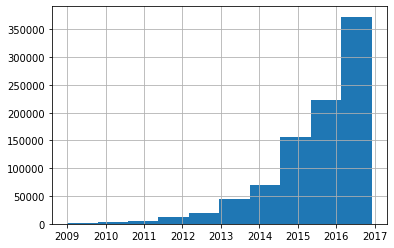

In [28]:
train_df['date'].hist()
# looks natural

<AxesSubplot:xlabel='created_utc_by_days'>

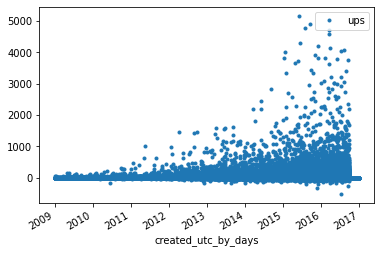

In [29]:
train_df[['created_utc_by_days','ups']].plot(x='created_utc_by_days',y='ups',style='.')
# looks natural

<AxesSubplot:xlabel='created_utc_by_days'>

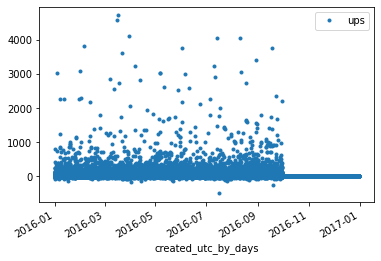

In [30]:
train_df[train_df['year']>2015][['created_utc_by_days','ups']].plot(x='created_utc_by_days',y='ups',style='.')

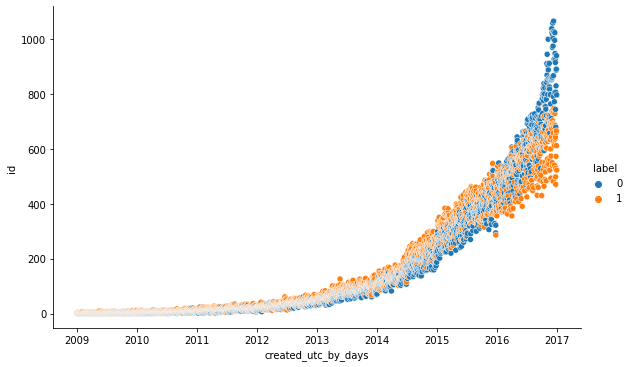

In [31]:
import seaborn as sns
sns.relplot(data = train_df.groupby(['created_utc_by_days','label'])['id'].count().reset_index(),\
            y='id',x='created_utc_by_days',hue='label', aspect=1.61)

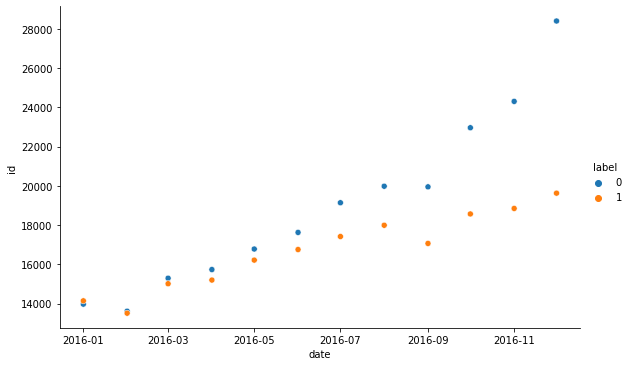

In [32]:
sns.relplot(data = train_df[train_df['year']>2015].groupby(['date','label'])['id'].count().reset_index(),\
            y='id',x='date',hue='label', aspect=1.61)

# Why did before 2016-03 number of 0 and 1 look so similar and after that number of 1 go down?

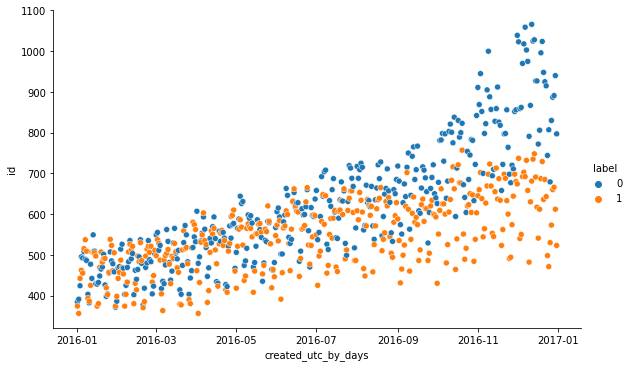

In [33]:
sns.relplot(data = train_df[train_df['year']>2015].groupby(['created_utc_by_days','label'])['id'].count().reset_index(),\
            y='id',x='created_utc_by_days',hue='label', aspect=1.61)

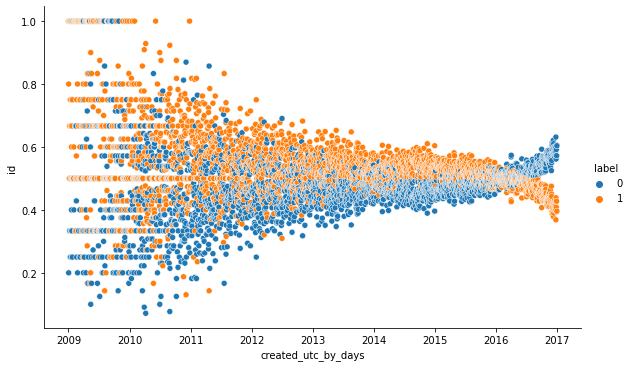

In [34]:
sns.relplot(data = (train_df.groupby(['created_utc_by_days','label'])['id'].count()/train_df.groupby(['created_utc_by_days'])['id'].count()).reset_index(),\
            y='id',x='created_utc_by_days',hue='label', aspect=1.61)

# Looks like being sarcastic in the internet loses popularity. Well i can believe in it

In [35]:
train_df['label'].value_counts()

0    454865
1    454832
Name: label, dtype: int64

# Okay looks like this dataset is what its suppose to be and we can use it to evaluate and train some kind neural network

In [36]:
import nlu
sarcasm_pipe  = nlu.load('en.classify.sarcasm')

classifierdl_use_sarcasm download started this may take some time.
Approximate size to download 21,3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923,7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354,6 KB
[OK!]


In [50]:
ds_size = 5000
train_df['text'] = train_df['comment']
sarcasm_predictions = sarcasm_pipe.predict(train_df['text'].iloc[0:ds_size])

In [51]:
sarcasm_predictions['sarcasm'].apply(lambda x: x[0]).value_counts()
sarcasm_predictions['label'] = train_df['label'].iloc[0:ds_size]

In [52]:
sarcasm_predictions['sarcasm_first']=sarcasm_predictions['sarcasm'].apply(lambda x: x[0]=='sarcasm')

In [53]:
(sarcasm_predictions['sarcasm_first']==sarcasm_predictions['label']).value_counts()/ds_size

True     0.5006
False    0.4994
dtype: float64